In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('/content/Laptop_price.csv')
data

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093060
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605920
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728330
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990720
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668020
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404780
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


# Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [4]:
data.shape

(1000, 7)

In [5]:
data.columns.tolist()

['Brand',
 'Processor_Speed',
 'RAM_Size',
 'Storage_Capacity',
 'Screen_Size',
 'Weight',
 'Price']

In [6]:
data.dtypes

,0
Brand,object
Processor_Speed,float64
RAM_Size,int64
Storage_Capacity,int64
Screen_Size,float64
Weight,float64
Price,float64


In [7]:
# missing values
data.isnull().sum()


,0
Brand,0
Processor_Speed,0
RAM_Size,0
Storage_Capacity,0
Screen_Size,0
Weight,0
Price,0


In [8]:
data.isna().sum()

,0
Brand,0
Processor_Speed,0
RAM_Size,0
Storage_Capacity,0
Screen_Size,0
Weight,0
Price,0


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
# summary statistics of the dataset
data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012945
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241880
75%,3.362610,32.000000,1000.000000,15.528589,4.212583,31566.214750
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935040


In [11]:
data['Brand'].unique()

array(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], dtype=object)

# EDA

,Price
Brand,
Acer,19984.613620
Lenovo,19974.929725
Asus,19854.238277
HP,19369.762930
Dell,18866.009978


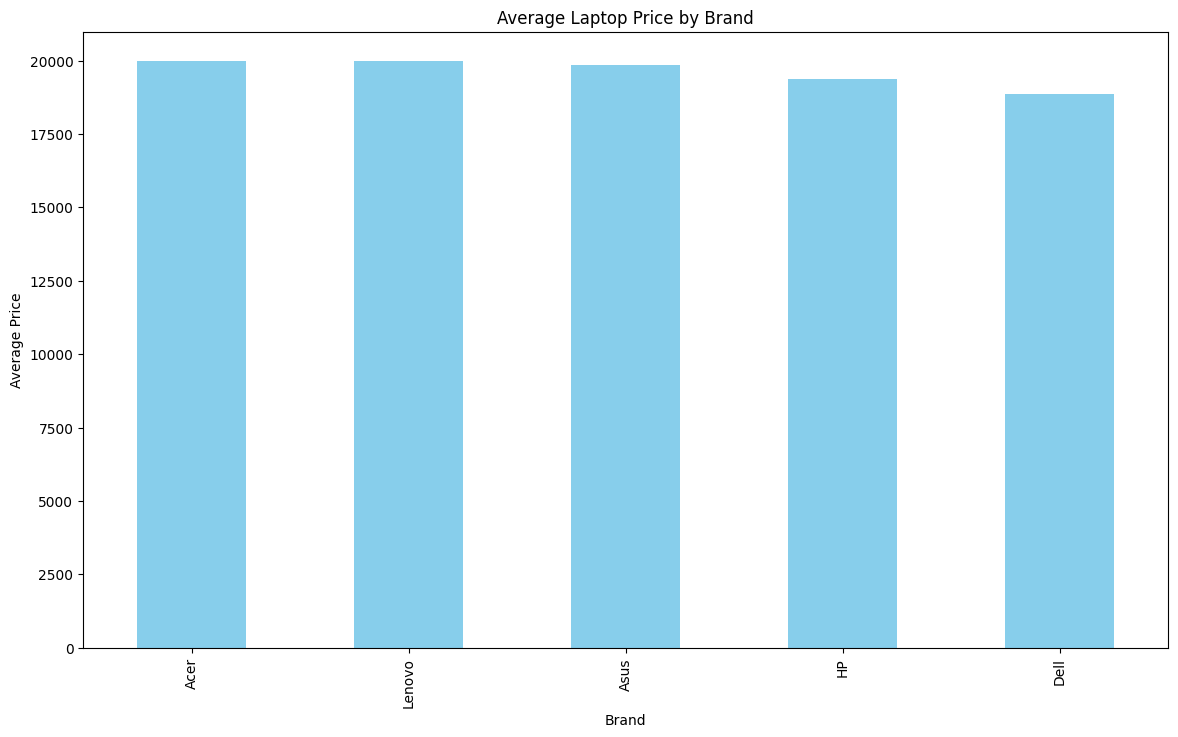

In [12]:
# average price by brand
avg_price_by_brand = data.groupby('Brand')['Price'].mean().sort_values(ascending = False)
plt.figure(figsize=(14,8))
avg_price_by_brand.plot(kind="bar", color="skyblue")
plt.title("Average Laptop Price by Brand")
plt.ylabel("Average Price")

avg_price_by_brand

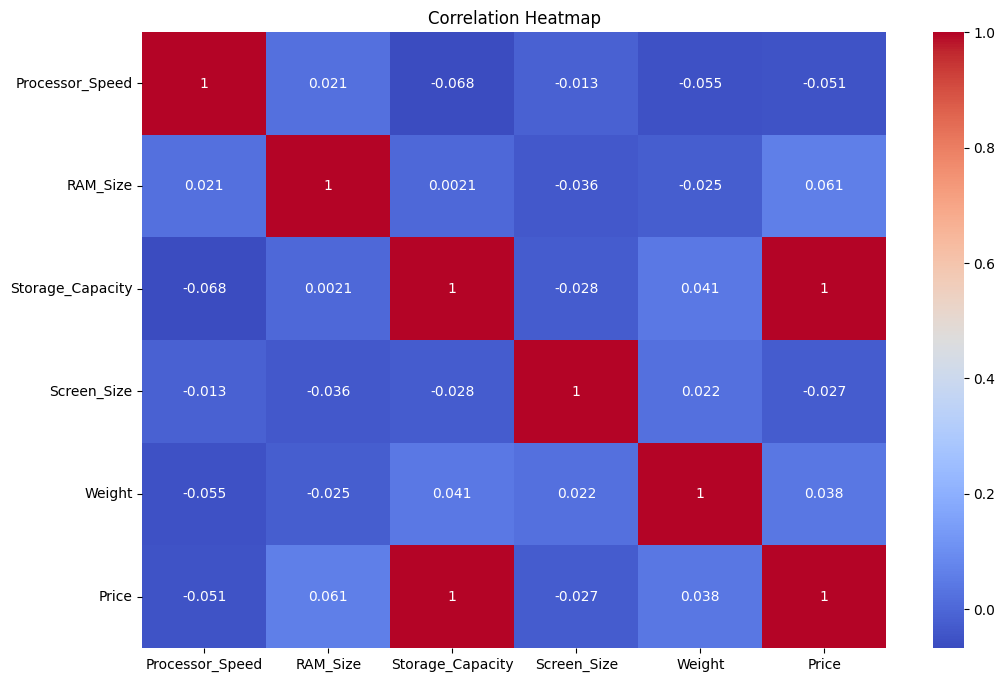

                  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
Processor_Speed          1.000000  0.021391         -0.067576    -0.013425   
RAM_Size                 0.021391  1.000000          0.002111    -0.036002   
Storage_Capacity        -0.067576  0.002111          1.000000    -0.027560   
Screen_Size             -0.013425 -0.036002         -0.027560     1.000000   
Weight                  -0.054603 -0.025382          0.041335     0.021995   
Price                   -0.050737  0.061237          0.997908    -0.026740   

                    Weight     Price  
Processor_Speed  -0.054603 -0.050737  
RAM_Size         -0.025382  0.061237  
Storage_Capacity  0.041335  0.997908  
Screen_Size       0.021995 -0.026740  
Weight            1.000000  0.038417  
Price             0.038417  1.000000  


In [13]:
# correlation heatmap for numneric columns
corr = data.corr(numeric_only  =True)
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()
print(corr)

In [14]:
data.groupby('RAM_Size')['Brand'].value_counts().reset_index()

,RAM_Size,Brand,count
0,4,HP,59
1,4,Acer,50
2,4,Dell,48
3,4,Asus,47
4,4,Lenovo,39
5,8,Asus,66
6,8,Lenovo,51
7,8,Acer,48
8,8,Dell,43
9,8,HP,38


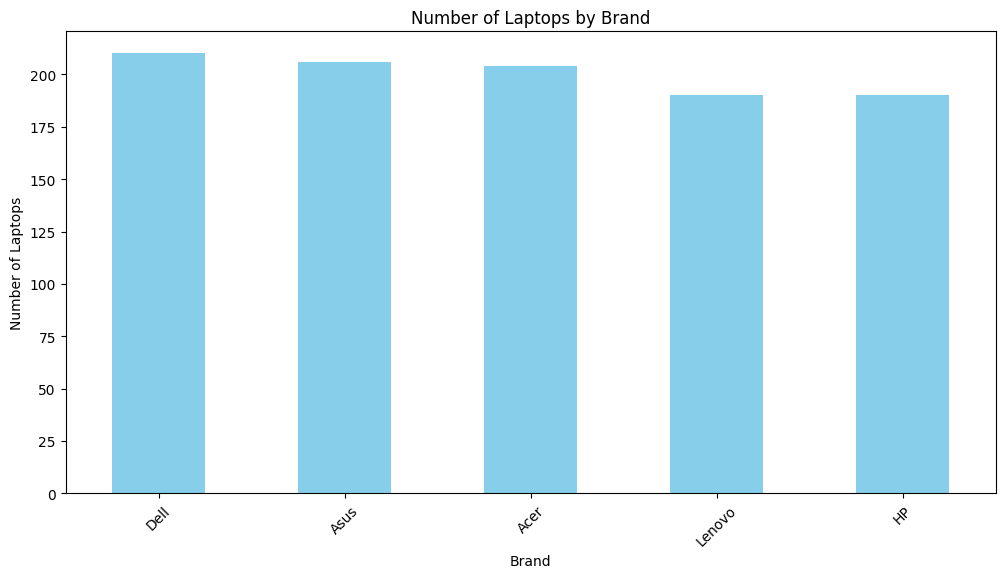

,count
Brand,
Dell,210
Asus,206
Acer,204
Lenovo,190
HP,190


In [15]:
# Count laptops per brand
brand_distribution = data['Brand'].value_counts().sort_values(ascending=False)

# Plot bar chart
brand_distribution.plot(kind='bar', color='skyblue', figsize = (12,6))
plt.title('Number of Laptops by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=45)
plt.show()

brand_distribution

In [16]:
data.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

Splitting the data into x & y

In [17]:
y = data['Price']
X= data[['Processor_Speed', 'RAM_Size', 'Storage_Capacity']]

In [18]:
X

,Processor_Speed,RAM_Size,Storage_Capacity
0,3.830296,16,512
1,2.912833,4,1000
2,3.241627,4,256
3,3.806248,16,512
4,3.268097,32,1000
...,...,...,...
995,3.343584,4,1000
996,2.780555,8,256
997,3.200569,4,512
998,1.604182,8,256


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [20]:
print(X_train.shape)
print(X_test.shape)

(800, 3)
(200, 3)


In [21]:
print(y_train.shape)
print(y_test.shape)

(800,)
(200,)


# Model Building and Evaluation

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [23]:
# linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [24]:
# evaluate the model
print('R2 Score:', r2_score(y_test, y_pred_lr))
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('MSE:', mean_squared_error(y_test, y_pred_lr))

R2 Score: 0.9996504379102482
MAE: 144.33274602614753
MSE: 31739.032096625073


In [26]:
# random forest
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [27]:
# evaluate the model
print('R2 Score:', r2_score(y_test, y_pred_rf))
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('MSE:', mean_squared_error(y_test, y_pred_rf))

R2 Score: 0.999456334402701
MAE: 179.31658364757496
MSE: 49362.96111160062


In [28]:
# XGBoost
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [29]:
# evaluate the model
print('R2 Score:', r2_score(y_test, y_pred_xgb))
print('MAE:', mean_absolute_error(y_test, y_pred_xgb))
print('MSE:', mean_squared_error(y_test, y_pred_xgb))

R2 Score: 0.9995139089665872
MAE: 170.09576871593748
MSE: 44135.38928757694


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3,5,7],
    'n_estimators': [100,200,300],
    'max_features': ["auto", "log2"]
}

In [35]:
gscv = GridSearchCV(RandomForestRegressor(), param_grid, cv =5)
gscv.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [36]:
gscv.best_params_

{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 300}

In [38]:
predictions = gscv.predict(X_test)
predictions

array([11599.27832476, 30978.61436926, 10347.4780541 ,  9899.61090287,
       31323.09190387, 30824.65944457, 11195.66205224, 16083.92053853,
       18100.27474309, 31565.91103042, 10693.12149378, 11310.96684351,
       32671.81292794, 10422.50192185, 16656.19750375, 10105.72972675,
       31508.16980994, 31672.09156087, 11014.09850441, 31251.08242141,
       11008.10589255, 11247.59752091, 10317.61446896, 11235.40975476,
       10746.65347715, 17307.42773833, 11111.85596582, 17864.09977458,
       11164.63721317, 31846.70362514, 16574.87014263, 32415.46130713,
       16435.92631315, 31354.46797582, 31330.76607531, 10983.94685738,
       30942.21830057,  9851.95396291, 32465.41737098, 16720.98142329,
       31704.50837631, 10323.71982993, 17140.44392611, 31022.02068287,
       16519.53028702, 16200.72155028, 32343.90947783, 16662.26558784,
       10858.03477786, 16598.20068426, 16211.20249902, 30961.07489679,
       10812.98593069, 11244.14127225, 31321.87472045, 32200.75395458,
      

In [39]:
mean_absolute_error(y_test, predictions)

660.8329619610349

In [40]:
data['Price'].describe()

,Price
count,1000.000000
mean,19604.187963
std,9406.064880
min,8570.012950
25%,10114.012945
50%,17287.241880
75%,31566.214750
max,33503.935040


Export the model

In [43]:
# Save the model
import joblib

filename = 'Laptop_price_prediction.pkl'  # Add .pkl to match the file format
joblib.dump(gscv, filename)

print(" Model saved as '{filename}'")


 Model saved as '{filename}'
